In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [3]:
SEED = 5
np.random.seed(SEED)

In [4]:
data = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv")
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
current_year = datetime.today().year
current_year

2023

In [6]:
data["age"] = current_year - data.model_year
data["target"] = [1 if x == "yes" else 0 for x in data.sold]
data = data.drop(["sold", "model_year"], axis=1)

columns = [col for col in data.columns if col != "target"]
x = data[columns]
y = data["target"]

data = data.iloc[: , 1:]
data

,mileage_per_year,price,age,target
0,21801,30941.02,23,1
1,7843,40557.96,25,1
2,7109,89627.50,17,0
3,26823,95276.14,8,0
4,7935,117384.68,9,1
...,...,...,...,...
9995,15572,97112.86,17,0
9996,13246,107424.63,21,1
9997,13018,93856.99,9,0
9998,10464,51250.57,12,1


In [7]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.25, stratify=y)

In [8]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(train_x, train_y)

acc = tree.score(test_x, test_y)
print(acc)

0.792


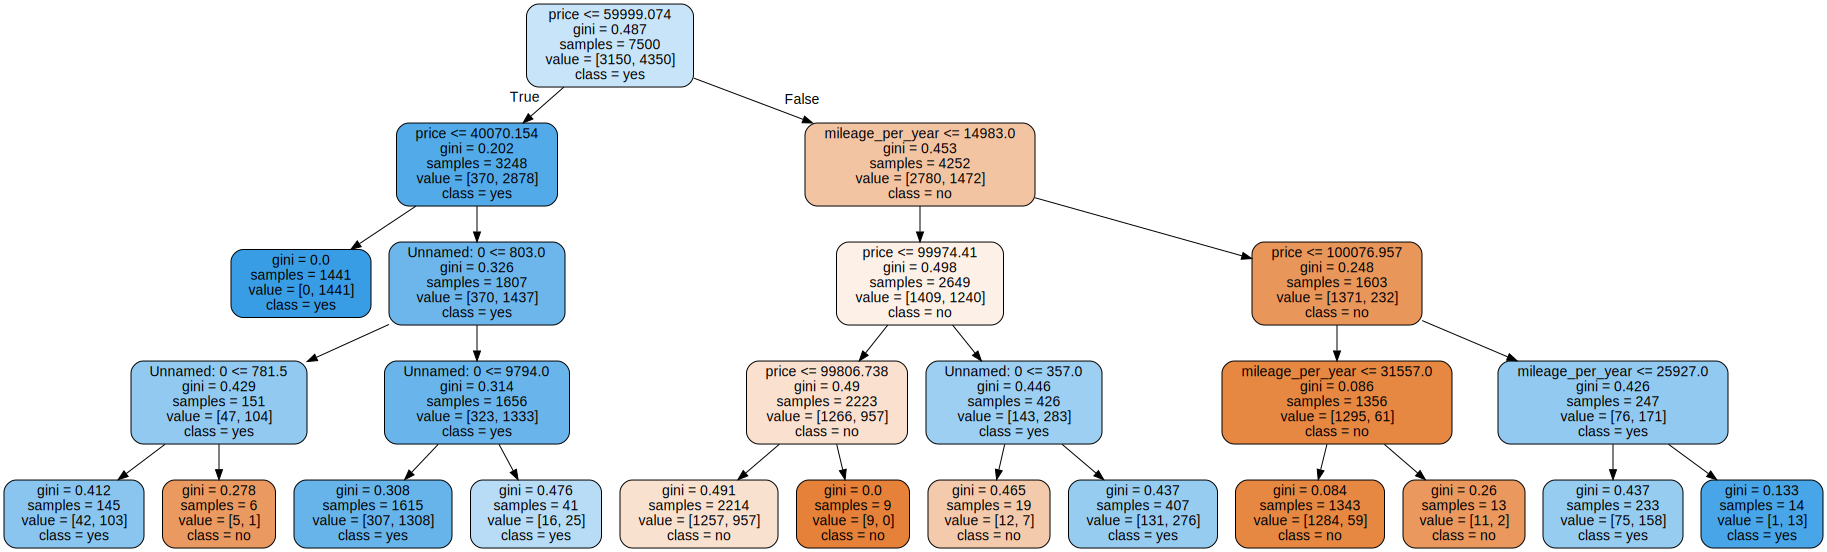

In [9]:
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=x.columns, filled=1,
                           rounded=1, class_names=["no", "yes"])

graph = graphviz.Source(dot_data)
graph